In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import flox

import torch

In [6]:
from anemoi.graphs.plotting.prepare import edge_list
from anemoi.graphs.plotting.prepare import node_list
from anemoi.graphs.plotting.prepare import compute_node_adjacencies

In [7]:
plt.style.use("/global/homes/t/timothys/nice.mplstyle")

In [22]:
ograph = torch.load("/global/homes/t/timothys/nested-eagle/0.25deg-06km/mesh-gen/o96-trim25/graph.cut084-18.nn0532.pt", weights_only=False, map_location="cpu")
hgraph = torch.load("/global/homes/t/timothys/nested-eagle/0.25deg-06km/mesh-gen/heal6-trim25/graph.cut076-18.nn2000.pt", weights_only=False, map_location="cpu")

In [23]:
def get_binned_adjacency(graph):
    lats_source_nodes, lons_source_nodes = node_list(graph, "data")
    lats_target_nodes, lons_target_nodes = node_list(graph, "hidden")
    adjacencies = compute_node_adjacencies(graph, "data", "hidden")
    
    lat_bins = np.arange(-90, 91, 1)
    
    ds = xr.Dataset(
        {"adjacency": ("node", adjacencies)},
        coords={"latitude": ("node", lats_target_nodes)},
    )
    
    result = ds.groupby_bins("latitude", lat_bins).mean()
    return result
    

In [29]:
def get_max_adjacency(graph):
    lats_source_nodes, lons_source_nodes = node_list(graph, "data")
    lats_target_nodes, lons_target_nodes = node_list(graph, "hidden")
    adjacencies = compute_node_adjacencies(graph, "data", "hidden")
    
    lat_bins = np.arange(-90, 91, 1)
    
    ds = xr.Dataset(
        {"adjacency": ("node", adjacencies)},
        coords={"latitude": ("node", lats_target_nodes)},
    )
    
    result = ds.groupby_bins("latitude", lat_bins).max()
    return result
    

In [30]:
oadj = get_binned_adjacency(ograph)
hadj = get_binned_adjacency(hgraph)
oadjmax = get_max_adjacency(ograph)
hadjmax = get_max_adjacency(hgraph)

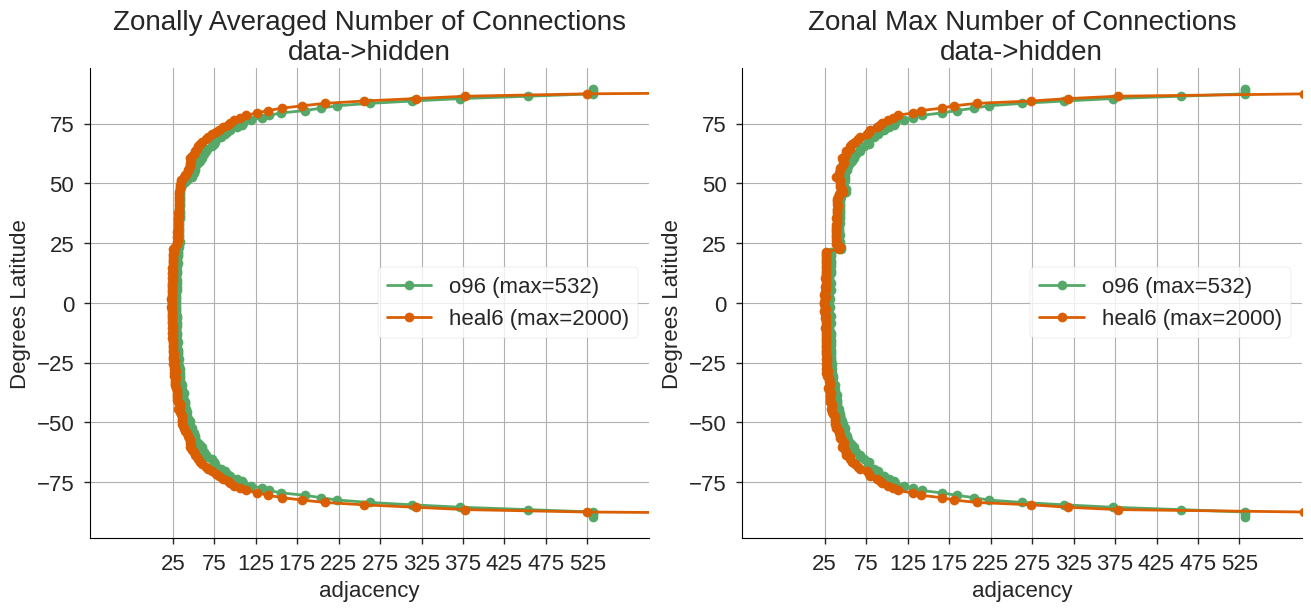

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(13,6))

ax=axs[0]
oadj.adjacency.plot(y="latitude_bins", marker="o", ax=ax, label=f"o96 (max={int(oadj.adjacency.max().values)})")
hadj.adjacency.plot(y="latitude_bins", marker="o", ax=ax, label=f"heal6 (max={int(hadj.adjacency.max().values)})")
ax.set(
    xticks=np.arange(25,550, 50),
    xlim=[None, 600],
    title="Zonally Averaged Number of Connections\ndata->hidden",
    ylabel="Degrees Latitude",
);
ax=axs[1]
oadjmax.adjacency.plot(y="latitude_bins", marker="o", ax=ax, label=f"o96 (max={int(oadjmax.adjacency.max().values)})")
hadjmax.adjacency.plot(y="latitude_bins", marker="o", ax=ax, label=f"heal6 (max={int(hadjmax.adjacency.max().values)})")
ax.set(
    xticks=np.arange(25,550, 50),
    xlim=[None, 600],
    title="Zonal Max Number of Connections\ndata->hidden",
    ylabel="Degrees Latitude",
);
[ax.grid(True) for ax in axs];
[ax.legend() for ax in axs];
